# Structure Factor for Hard Spheres

Using Wertheim's exact solution for Percus-Yevick integral equation.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_ck(eta, k):
    common_denom = (1.0 - eta)**4
    alpha = -(1.0 + 2.0 * eta)**2.0 / common_denom
    delta = 6.0 * eta * (1.0 + 0.5 * eta)**2 / common_denom
    gamma = -0.5 * eta * alpha
    
    term1 = 4.0 * math.pi / (k**6)
    term2 = alpha * (k**3) * (math.sin(k) - k * math.cos(k)) - 24.0 * gamma
    term3 = (k**2) * (2.0 * k * math.sin(k) - (k**2 - 2.0) * math.cos(k) - 2.0)
    term4 = (4.0 * k**3 - 24.0 * k) * math.sin(k)
    term5 = (k**4 - 12.0 * k**2 + 24.0) * math.cos(k)

    return term1 * (term2 + delta * term3 - gamma * (term4 - term5))

In [13]:
def calculate_sk(eta, k):
    rho = 6.0 * eta / math.pi
    sk = 1.0 / (1.0 - rho * calculate_ck(eta, k))

    return sk

In [14]:
eta = 0.25 # Volume fraction
set_of_ks = np.linspace(0.01, 41.0, 500)
structure_factor = []

for k in set_of_ks:
    sk = calculate_sk(eta, k)
    
    structure_factor.append(sk)

In [15]:
target0 = np.loadtxt('target.dat', usecols = 0)
target1 = np.loadtxt('target.dat', usecols = 1)

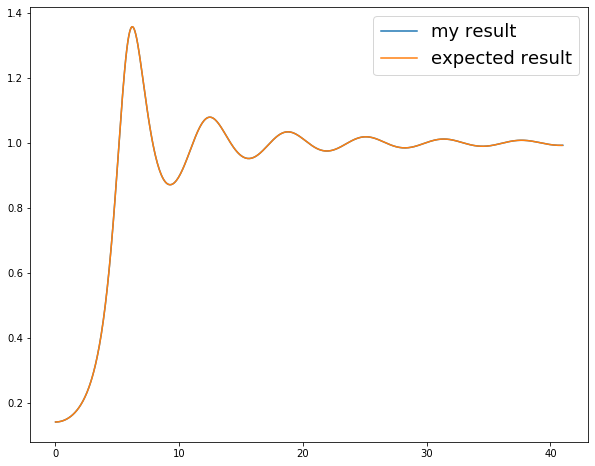

In [16]:
fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 1, 1)
plt.plot(set_of_ks, structure_factor, label = 'my result');
plt.plot(target0, target1, label = 'expected result');
plt.legend(fontsize = 18);

# Scattering functions for the short time

In [48]:
def short_scattering(eta, k, d0):
    sk = calculate_sk(eta, k)
    time = np.linspace(0.0, 2.0e-1, 25)
    F = sk * np.exp((-1.0) * (k**2) * d0 * time / sk)
    F_self = np.exp((-1.0) * (k**2) * d0 * time)
    
    return time, F, F_self

In [49]:
k = 4.1
D0 = 1.0

time, F, Fs = short_scattering(eta, k, D0)

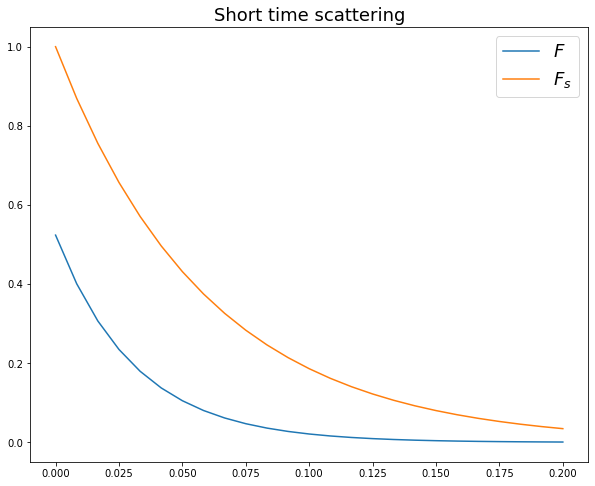

In [50]:
fig = plt.figure(figsize = (10, 8))
fig.add_subplot(1, 1, 1)
plt.plot(time, F, label = r'$F$');
plt.plot(time, Fs, label = r'$F_s$');
plt.title("Short time scattering", size = 18)
plt.legend(fontsize = 18);